# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=400)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Perform API Calls

#query_url* Include a print log of each city as it'sbeing processed (with the city number and city name).

#create empty lists for data acquisition
latitude = []
cityID = []
cityTemp = []
cityWind = []
cityHumd = []
cityCloud= []
notfoundcity = []
foundCities = []
countries = []

count = 0
totcities = len(cities)

#Perform a weather check on each city using a series of successive API calls.
for city in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="
    query_url = query_url + city
    response = requests.get(query_url).json()
    
    try:
        #get Latitude
        lat = response['coord']['lat']
        latitude.append(lat)

        #get city_ID
        c_id = response['id']
        cityID.append(c_id)

        #get temp
        temp = response['main']['temp_max']
        cityTemp.append(temp)

        #get Wind Speed
        w_speed = response['wind']['speed']
        cityWind.append(w_speed)

        #get Humidity
        humid = response['main']['humidity']
        cityHumd.append(humid)    

        #get clouds
        clouds = response['clouds']['all']
        cityCloud.append(clouds)
        
        #Create a list of Found Cities
        foundCities.append(city)
        
        count = count + 1
        print(f'Processing Record {count} of {totcities} | {city}')
        
    except KeyError:
        notfoundcity.append(city)
        print('City not found | ',city)
        totcities = totcities - 1

print ('==========================')
print ('====DATA RETRIVAL DONE====')
print ('==========================')

Processing Record 1 of 248 | bredasdorp
Processing Record 2 of 248 | cidreira
Processing Record 3 of 248 | qaanaaq
Processing Record 4 of 248 | busselton
Processing Record 5 of 248 | butaritari
Processing Record 6 of 248 | hithadhoo
City not found |  nizhneyansk
Processing Record 7 of 247 | husavik
Processing Record 8 of 247 | hobart
Processing Record 9 of 247 | cape town
Processing Record 10 of 247 | talnakh
City not found |  andevoranto
Processing Record 11 of 246 | lavrentiya
City not found |  jiaojiang
Processing Record 12 of 245 | neyshabur
Processing Record 13 of 245 | new norfolk
Processing Record 14 of 245 | vaini
Processing Record 15 of 245 | avarua
Processing Record 16 of 245 | karangasem
Processing Record 17 of 245 | bambanglipuro
Processing Record 18 of 245 | mahebourg
Processing Record 19 of 245 | georgetown
Processing Record 20 of 245 | mar del plata
Processing Record 21 of 245 | atuona
Processing Record 22 of 245 | kodiak
Processing Record 23 of 245 | punta arenas
Proces

Processing Record 188 of 220 | waddan
City not found |  mys shmidta
Processing Record 189 of 219 | raudeberg
Processing Record 190 of 219 | komsomolskiy
Processing Record 191 of 219 | chuncheng
Processing Record 192 of 219 | buenos aires
City not found |  dianopolis
Processing Record 193 of 218 | kajaani
Processing Record 194 of 218 | bathsheba
Processing Record 195 of 218 | novikovo
Processing Record 196 of 218 | norman wells
Processing Record 197 of 218 | kavieng
Processing Record 198 of 218 | brae
Processing Record 199 of 218 | los llanos de aridane
Processing Record 200 of 218 | labuhan
Processing Record 201 of 218 | caohe
Processing Record 202 of 218 | sri aman
Processing Record 203 of 218 | the valley
Processing Record 204 of 218 | lata
Processing Record 205 of 218 | maniitsoq
Processing Record 206 of 218 | henderson
Processing Record 207 of 218 | svetlogorsk
Processing Record 208 of 218 | bandarbeyla
City not found |  saleaula
Processing Record 209 of 217 | snihurivka
City not f

In [5]:
print('Latitude: ', len(latitude))
print('cityID: ', len(cityID))
print('cityTemp: ', len(cityTemp))
print('cityWind: ', len(cityWind))
print('cityHumd: ', len(cityHumd))
print('cityCloud: ', len(cityCloud))
print('foundCities: ', len(foundCities))


Latitude:  214
cityID:  214
cityTemp:  214
cityWind:  214
cityHumd:  214
cityCloud:  214
foundCities:  214


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict ={"City":foundCities, "cityID":cityID, "Latitude":latitude, "Temp Max (F)":cityTemp, \
               "Wind Speed":cityWind, "Humidity":cityHumd, "Cloudiness":cityCloud}

weather_df = pd.DataFrame(weather_dict)

# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.head()

,City,cityID,Latitude,Temp Max (F),Wind Speed,Humidity,Cloudiness
0,bredasdorp,1015776,-34.53,69.80,3.36,94,88
1,cidreira,3466165,-30.17,69.10,12.46,96,8
2,qaanaaq,3831208,77.48,-29.64,7.43,91,0
3,busselton,2075265,-33.64,93.00,6.64,21,0
4,butaritari,2110227,3.07,83.23,16.26,100,92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

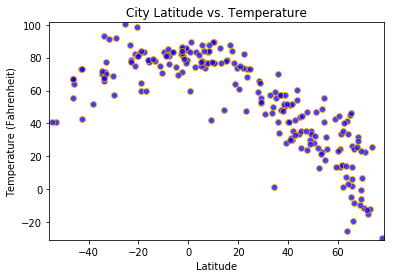

In [10]:
# Tells matplotlib that we want to make a scatter plot
plt.scatter(weather_df['Latitude'], weather_df['Temp Max (F)'], marker="o", facecolors="blue",
            edgecolors="orange", alpha=0.75)
# The y limits of our scatter plot is 0 to 1
plt.xlim(weather_df['Latitude'].min()-1, weather_df['Latitude'].max()+1)
plt.ylim(weather_df['Temp Max (F)'].min()-1, weather_df['Temp Max (F)'].max()+1)

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")

plt.savefig("../Images/temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

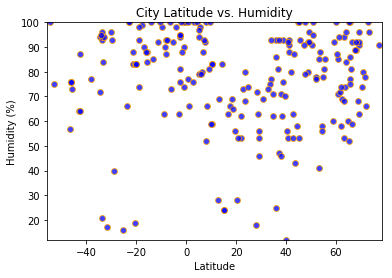

In [11]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], marker="o", facecolors="blue",
            edgecolors="orange", alpha=0.75)

plt.xlim(weather_df['Latitude'].min()-1, weather_df['Latitude'].max()+1)
plt.ylim(weather_df['Humidity'].min(), weather_df['Humidity'].max())

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

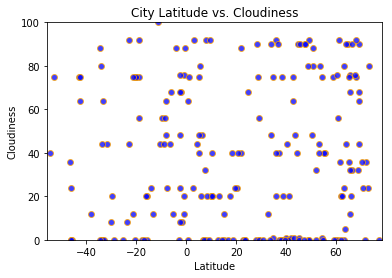

In [12]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], marker="o", facecolors="blue",
            edgecolors="orange", alpha=0.75)
plt.xlim(weather_df['Latitude'].min()-1, weather_df['Latitude'].max()+1)
plt.ylim(weather_df['Cloudiness'].min(), weather_df['Cloudiness'].max())

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

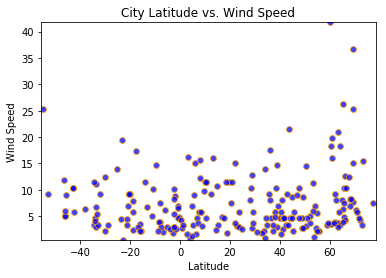

In [13]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], marker="o", facecolors="blue",
            edgecolors="orange", alpha=0.75)
plt.xlim(weather_df['Latitude'].min()-1, weather_df['Latitude'].max()+1)
plt.ylim(weather_df['Wind Speed'].min(), weather_df['Wind Speed'].max())

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/WindSpeed.png")
plt.show()